In [2]:
# https://medium.com/@pablosjv/importing-local-python-modules-into-jupyter-notebooks-87336b2d7746
%load_ext autoreload
%autoreload 2
import os
import sys
import random
import multiprocessing
module_path = os.path.abspath(os.path.join('./')) # or the path to your source code
sys.path.insert(0, module_path)

In [ ]:
%reload_ext autoreload

In [48]:
scenario_table = {}

# Deepso first

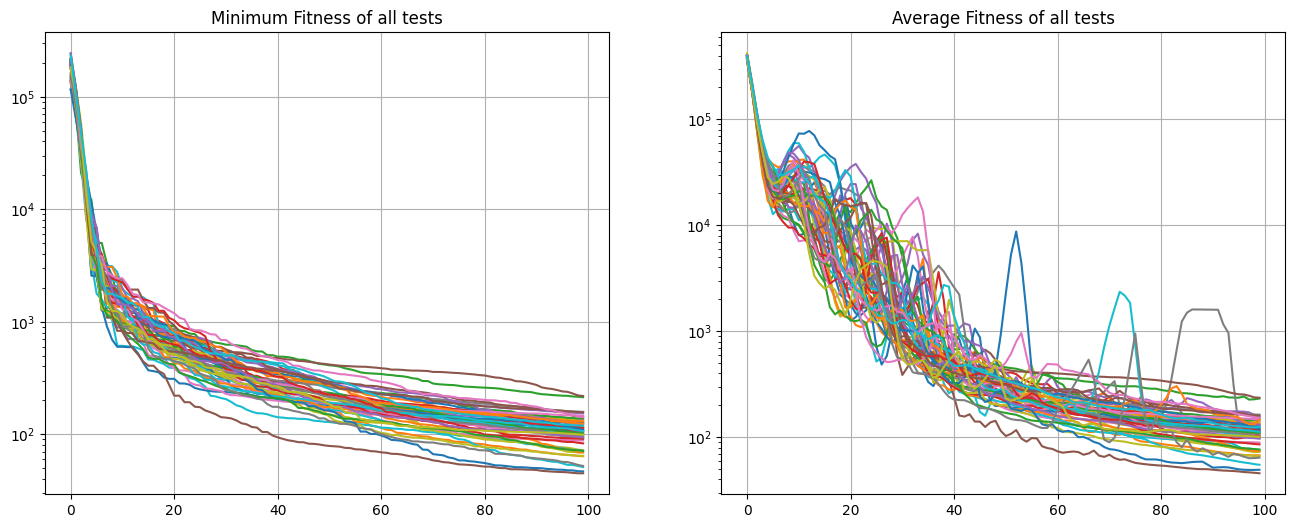

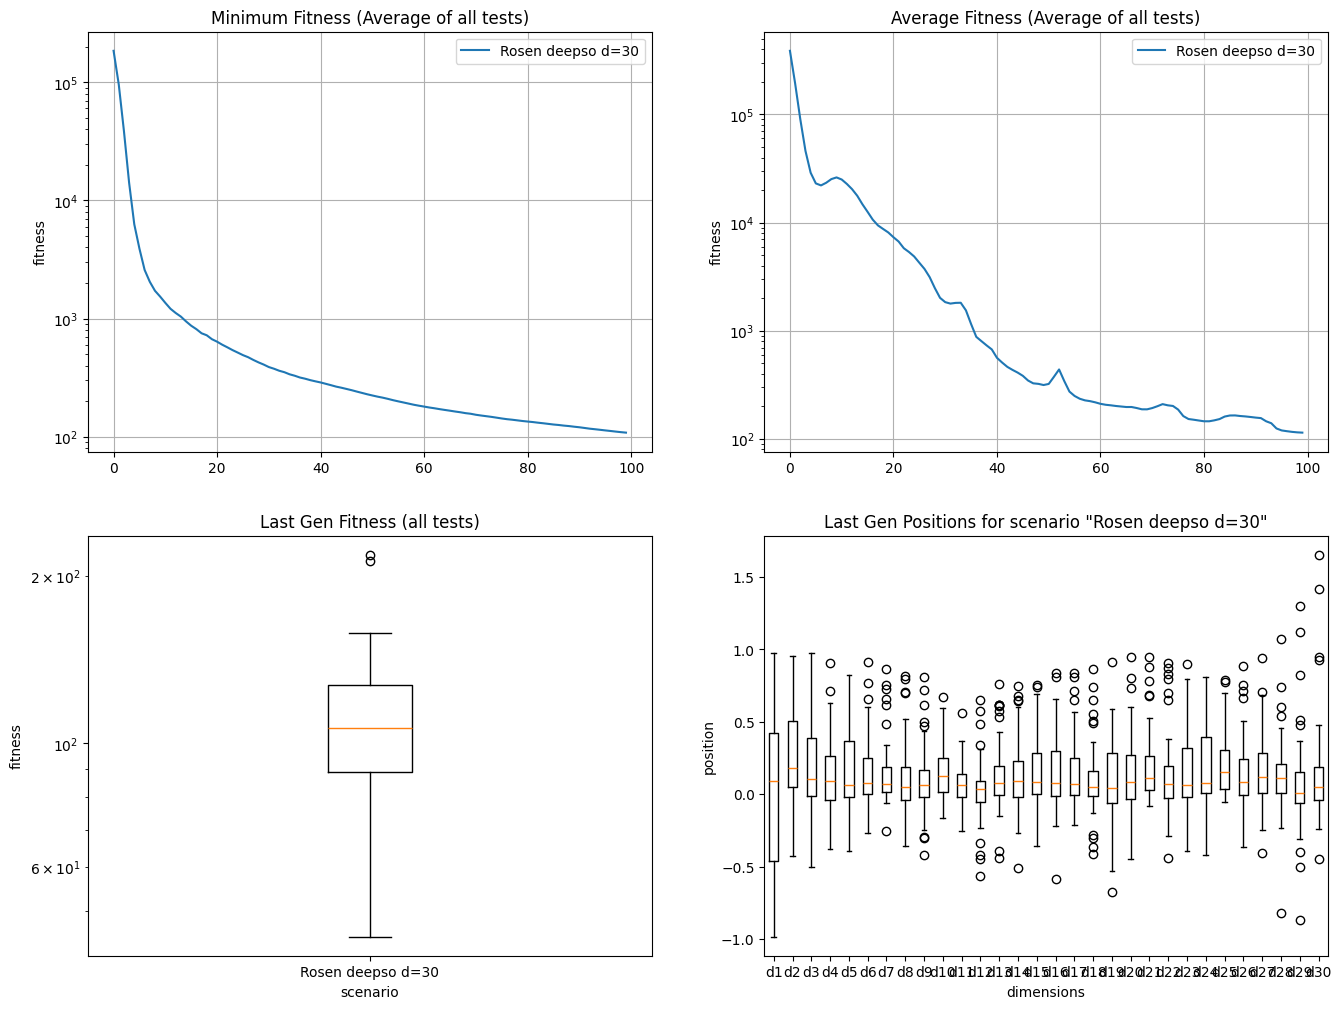

In [49]:
from graphical_visualization import collect_data_on_scenario
from graphical_visualization import collect_data_on_tests
from graphical_visualization import contour_over_population
from graphical_visualization import plot_fitness_over_scenarios
from graphical_visualization import plot_fitness_over_tests

from algorithm_classes import LoopDEEPSO
from algorithm_loop import initial_random_pop

from individual_class import IndividualDEEPSO
import numpy as np

class Rosenbrock(IndividualDEEPSO):
  def _fitness_function(self,X,a=1,b=100):
    return np.sum(b * (X[1:] - X[:-1]**2)**2 + (a - X[:-1])**2,axis=0)

# experiment to make and test title
experiment_name="deepso_rand_1"
title="Rosen deepso d=30"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["fitness_last"] = []
scenario_table[title]["position_last"] = []

# optional collectors for this scenario only
table_test = {}

num_tests = 50 # number of tests to make
bounds = [-5,5]
population_size = 30
max_it=100
deepso = LoopDEEPSO(title,"deepso_rand_1", bounds,
                    population_size=population_size,
                    max_it=max_it,
                    tcom=0.94,
                    tmut=0.2,
                    velocity_bounds=[-1,1],
                    w_bounds=[0,1],
                    wi_initial=0.8,
                    wa_initial=0.8,
                    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=30,seed=num)
  generation_data = deepso.test(coordinates, Rosenbrock, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       
    
for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
collect_data_on_scenario(scenario_table[title], num_tests) # Collecting entire scenario data

plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
#contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animacoes/"+title+".mp4",max_it=100)
#from IPython.display import Video
#Video("animacoes/"+title+".mp4")

# CDEEPSO

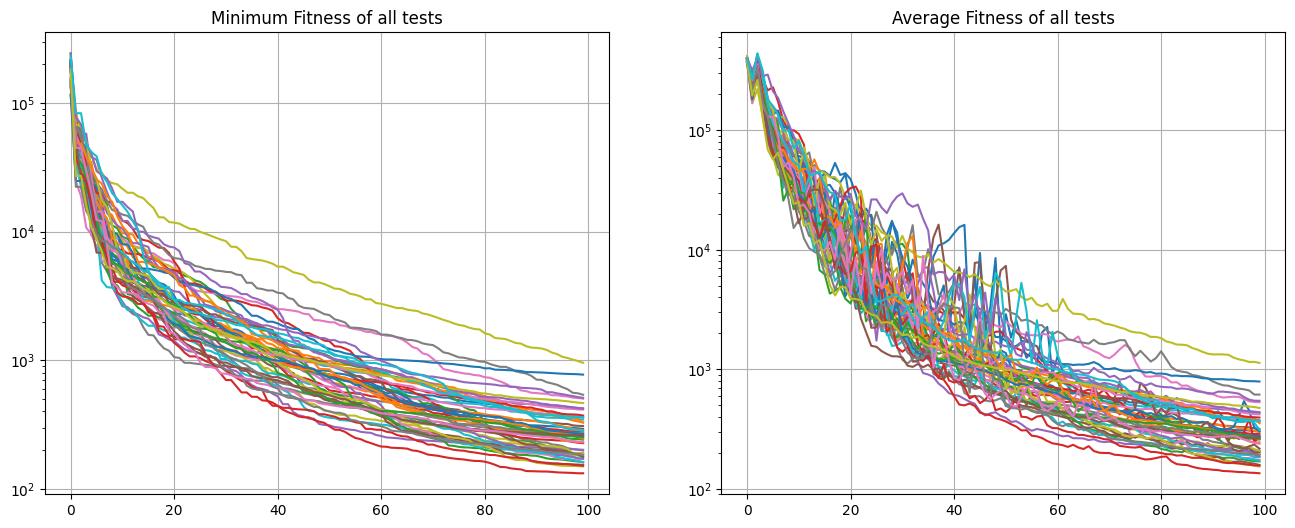

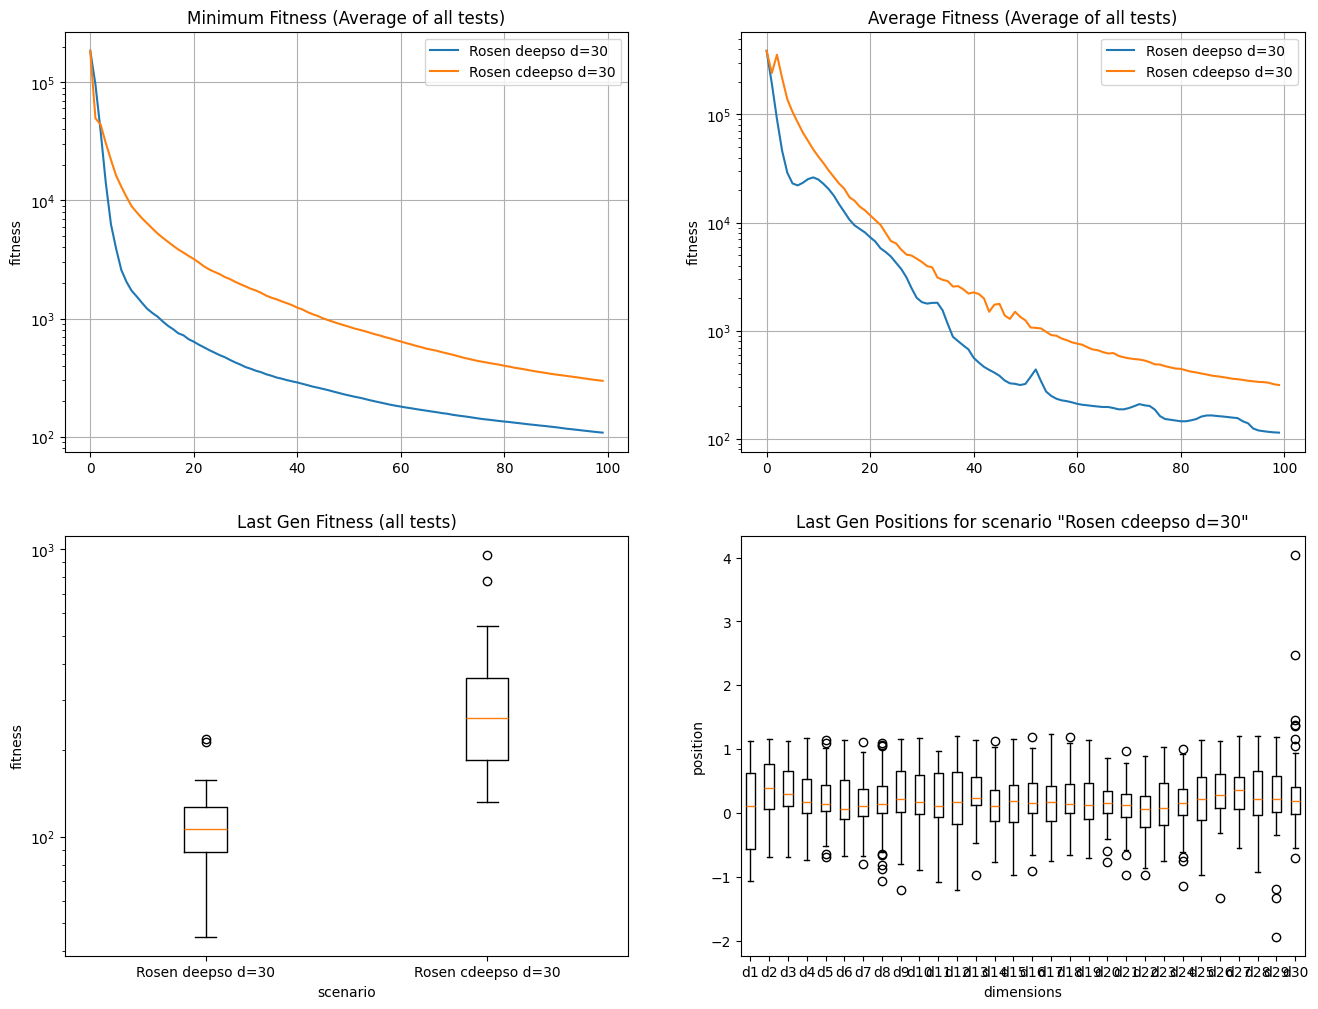

In [50]:
from graphical_visualization import collect_data_on_scenario
from graphical_visualization import collect_data_on_tests
from graphical_visualization import contour_over_population
from graphical_visualization import plot_fitness_over_scenarios
from graphical_visualization import plot_fitness_over_tests

from algorithm_classes import LoopCDEEPSO
from individual_class import IndividualCDEEPSO
from algorithm_loop import initial_random_pop

import numpy as np

class Rosenbrock(IndividualCDEEPSO):
  def _fitness_function(self,X,a=1,b=100):
    return np.sum(b * (X[1:] - X[:-1]**2)**2 + (a - X[:-1])**2,axis=0)

# experiment to make and test title
experiment_name="cdeepso_rand_1"
title="Rosen cdeepso d=30"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["fitness_last"] = []
scenario_table[title]["position_last"] = []

# optional collectors for this scenario only
table_test = {}

num_tests = 50 # number of tests to make
bounds = [-5,5]
population_size = 50
max_it=100
cdeepso = LoopCDEEPSO(title,experiment_name, bounds,
                    population_size=population_size,
                    f_var=1.0,
                    max_it=max_it,
                    tcom=0.94,
                    tmut=0.2,
                    #velocity_bounds=[-1,1],
                    w_bounds=[0,1],
                    wi_initial=0.5,
                    wa_initial=0.5,
                    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=30,seed=num)
  generation_data = cdeepso.test(coordinates, Rosenbrock, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       
    
for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
collect_data_on_scenario(scenario_table[title], num_tests) # Collecting entire scenario data

plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
#contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animacoes/"+title+".mp4",max_it=100)
#from IPython.display import Video
#Video("animacoes/"+title+".mp4")

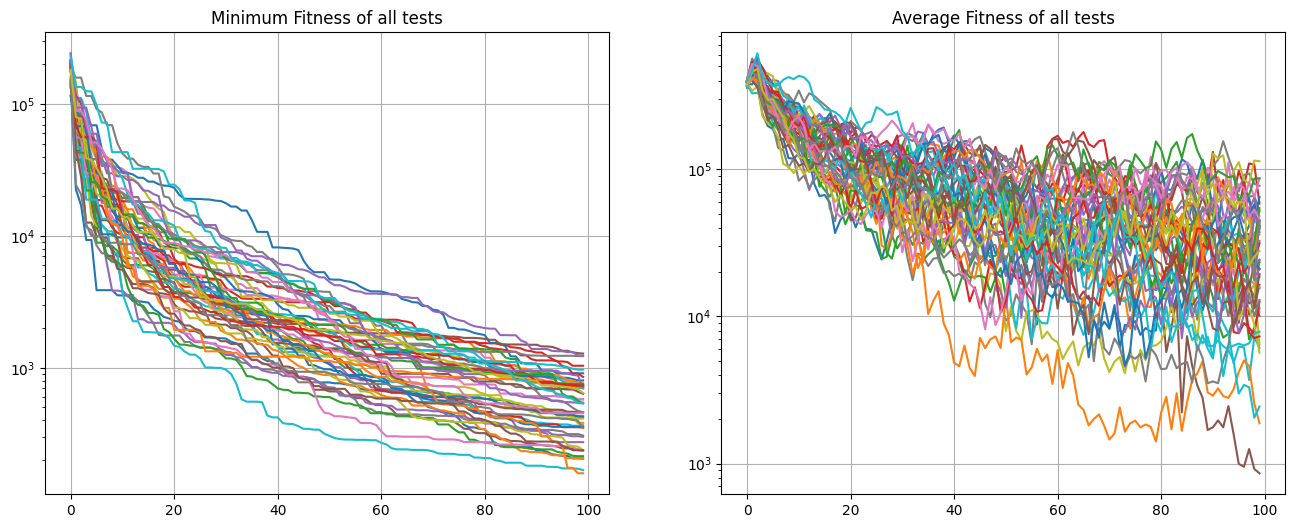

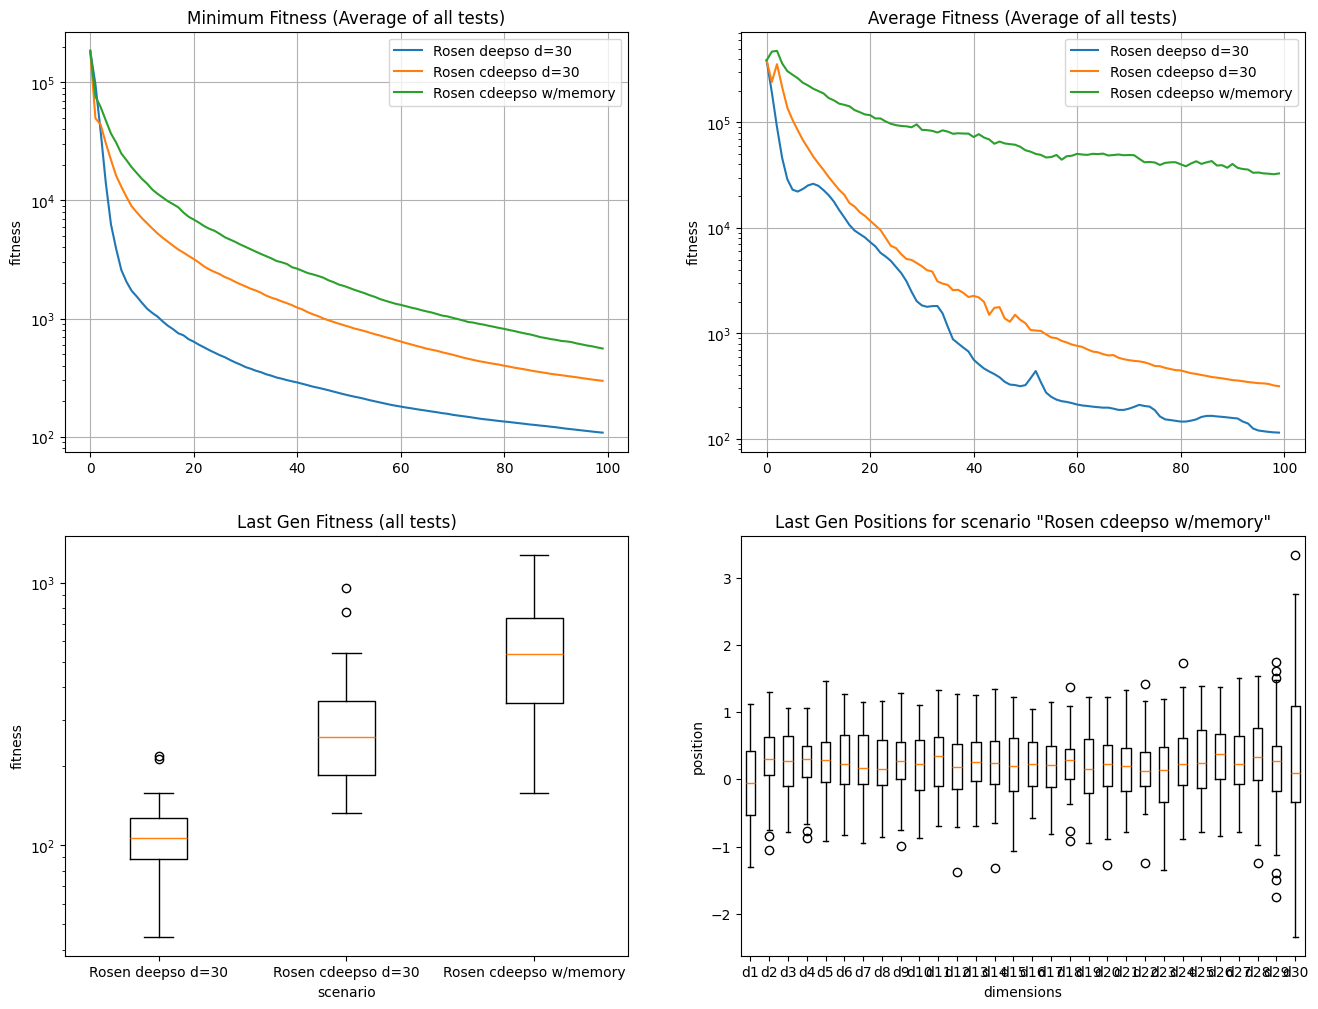

In [52]:
from graphical_visualization import collect_data_on_scenario
from graphical_visualization import collect_data_on_tests
from graphical_visualization import contour_over_population
from graphical_visualization import plot_fitness_over_scenarios
from graphical_visualization import plot_fitness_over_tests

from algorithm_classes import LoopCDEEPSO
from individual_class import IndividualCDEEPSO
from algorithm_loop import initial_random_pop

import numpy as np

class Rosenbrock(IndividualCDEEPSO):
  def _fitness_function(self,X,a=1,b=100):
    return np.sum(b * (X[1:] - X[:-1]**2)**2 + (a - X[:-1])**2,axis=0)

# experiment to make and test title
experiment_name="cdeepso_memory"
title="Rosen cdeepso w/memory"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["fitness_last"] = []
scenario_table[title]["position_last"] = []

# optional collectors for this scenario only
table_test = {}

num_tests = 50 # number of tests to make
bounds = [-5,5]
population_size = 50
max_it=100
cdeepso = LoopCDEEPSO(title,experiment_name, bounds,
                    population_size=population_size,
                    f_var=1.0,
                    max_it=max_it,
                    tcom=0.94,
                    tmut=0.2,
                    #velocity_bounds=[-1,1],
                    w_bounds=[0,1],
                    wi_initial=0.5,
                    wa_initial=0.5,
                    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=30,seed=num)
  generation_data = cdeepso.test(coordinates, Rosenbrock, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       
    
for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
collect_data_on_scenario(scenario_table[title], num_tests) # Collecting entire scenario data

plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
#contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animacoes/"+title+".mp4",max_it=100)
#from IPython.display import Video
#Video("animacoes/"+title+".mp4")

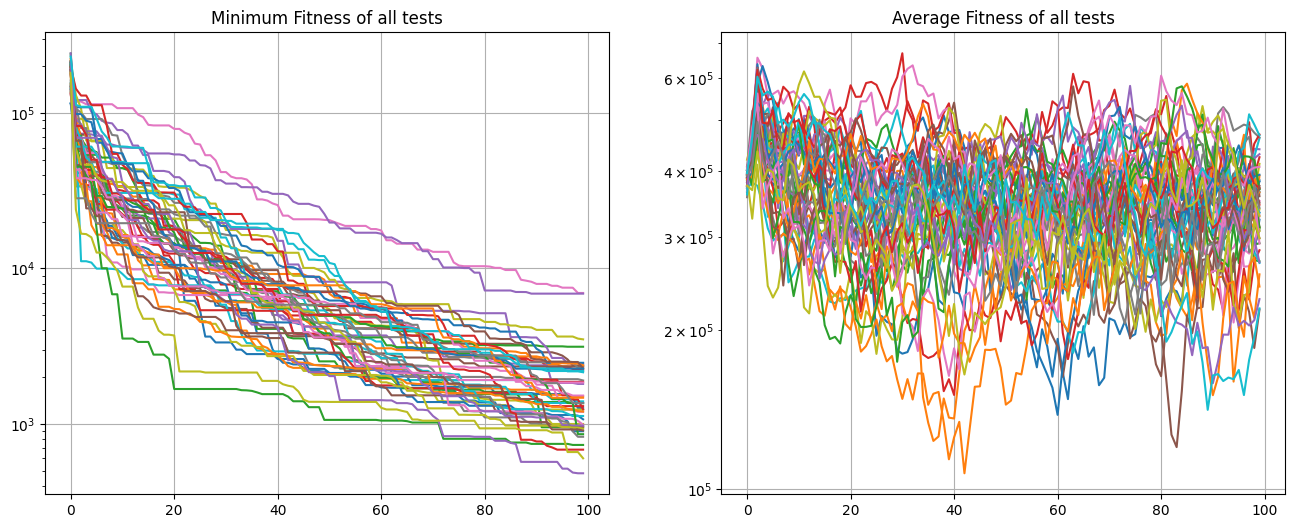

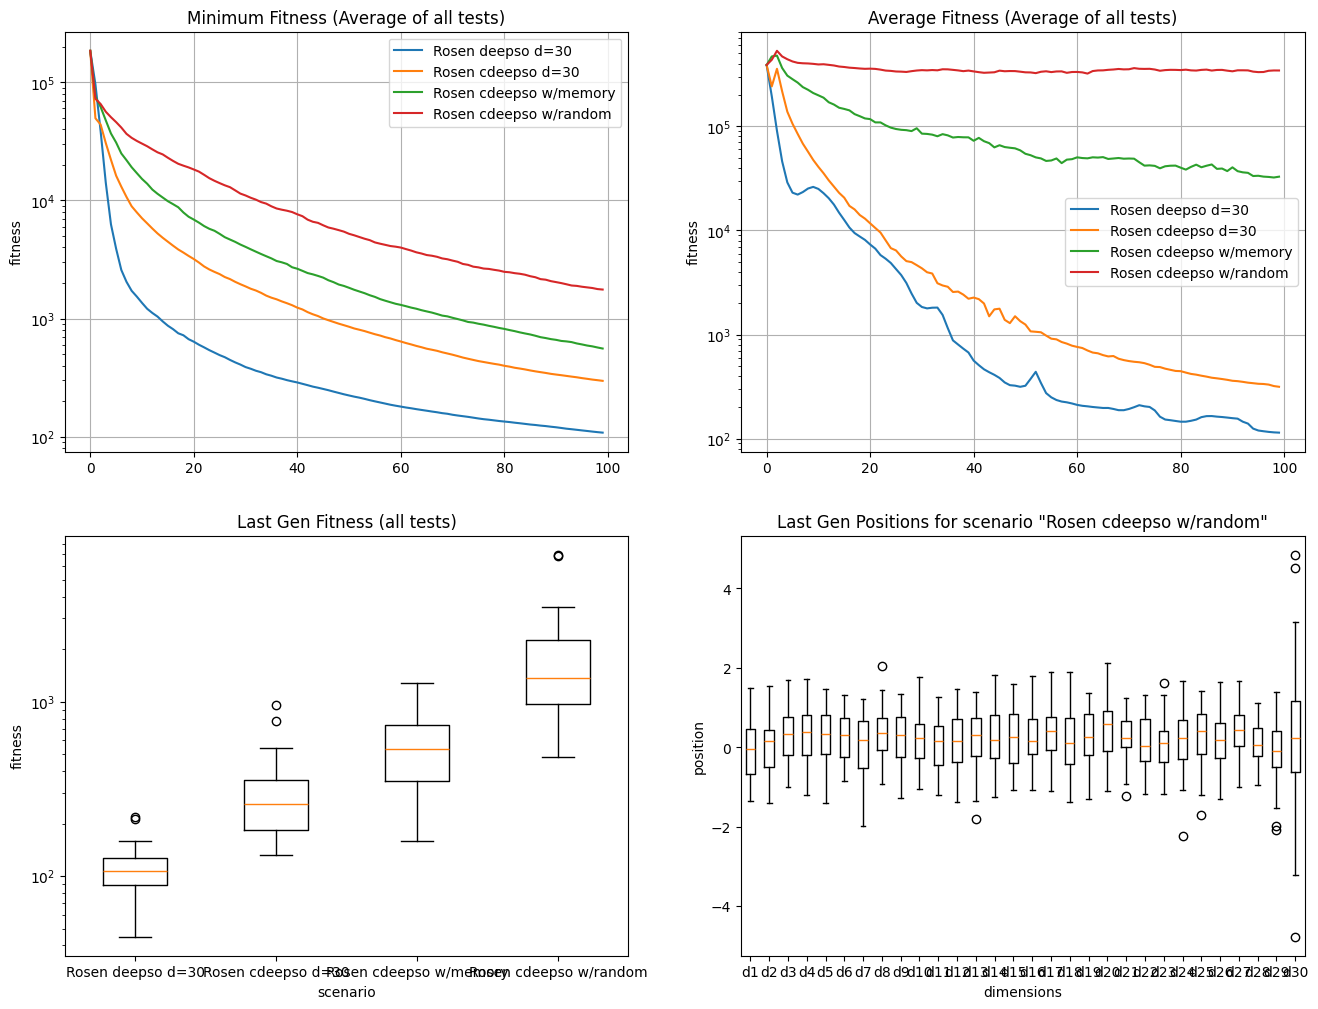

In [53]:
# experiment to make and test title
experiment_name="cdeepso_rand_1"
title="Rosen cdeepso w/random"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["fitness_last"] = []
scenario_table[title]["position_last"] = []

# optional collectors for this scenario only
table_test = {}

num_tests = 50 # number of tests to make
bounds = [-5,5]
population_size = 50
max_it=100
cdeepso = LoopCDEEPSO(title,experiment_name, bounds,
                    population_size=population_size,
                    f_var=1.0,
                    max_it=max_it,
                    tcom=0.94,
                    tmut=0.2,
                    #velocity_bounds=[-1,1],
                    w_bounds=[0,1],
                    wi_initial=0.5,
                    wa_initial=0.5,
                    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=30,seed=num)
  generation_data = cdeepso.test(coordinates, Rosenbrock, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       
    
for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
collect_data_on_scenario(scenario_table[title], num_tests) # Collecting entire scenario data

plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
#contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animacoes/"+title+".mp4",max_it=100)
#from IPython.display import Video
#Video("animacoes/"+title+".mp4")

# Trying in 10 dim and 30 pop

In [55]:
scenario_table = {}

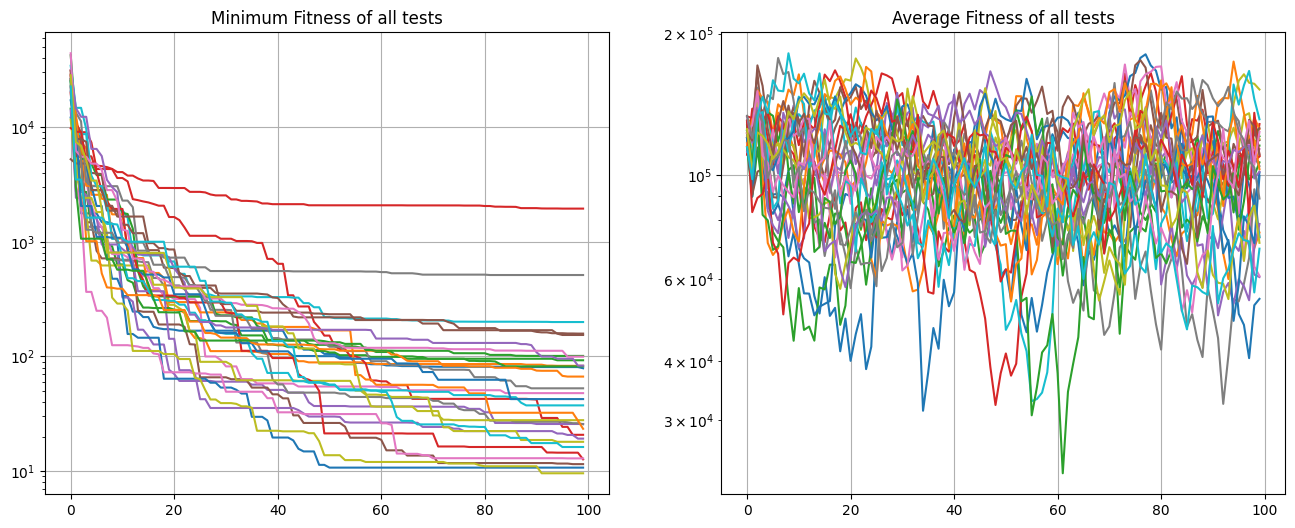

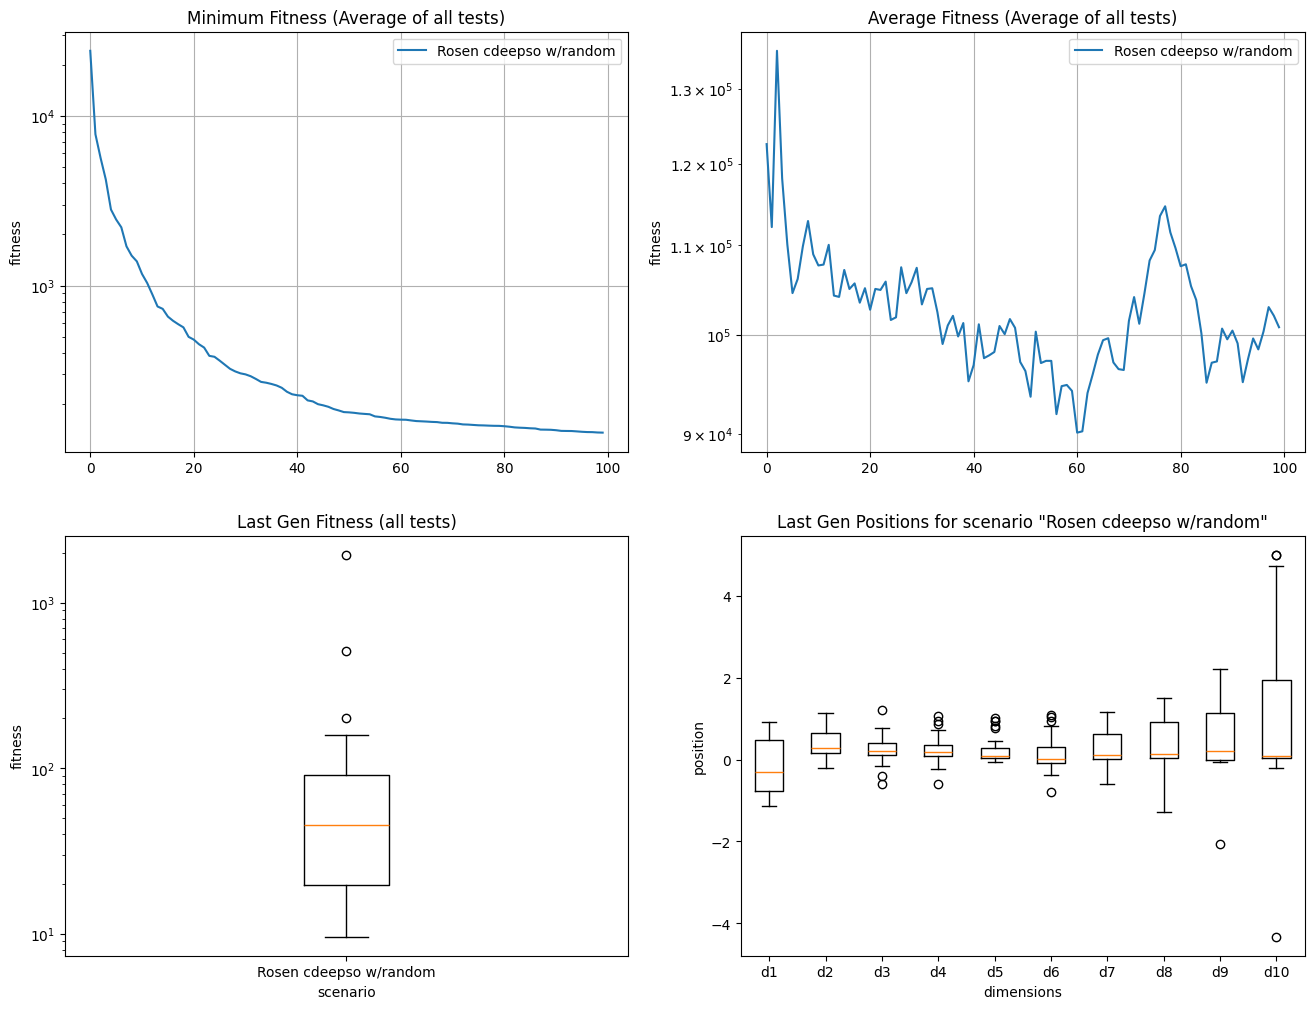

In [56]:
# experiment to make and test title
experiment_name="cdeepso_rand_1"
title="Rosen cdeepso w/random"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["fitness_last"] = []
scenario_table[title]["position_last"] = []

# optional collectors for this scenario only
table_test = {}

num_tests = 30 # number of tests to make
bounds = [-5,5]
population_size = 50
max_it=100
cdeepso = LoopCDEEPSO(title,experiment_name, bounds,
                    population_size=population_size,
                    f_var=1.0,
                    max_it=max_it,
                    tcom=0.94,
                    tmut=0.2,
                    #velocity_bounds=[-1,1],
                    w_bounds=[0,1],
                    wi_initial=0.5,
                    wa_initial=0.5,
                    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=10,seed=num)
  generation_data = cdeepso.test(coordinates, Rosenbrock, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       
    
for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
collect_data_on_scenario(scenario_table[title], num_tests) # Collecting entire scenario data

plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
#contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animacoes/"+title+".mp4",max_it=100)
#from IPython.display import Video
#Video("animacoes/"+title+".mp4")

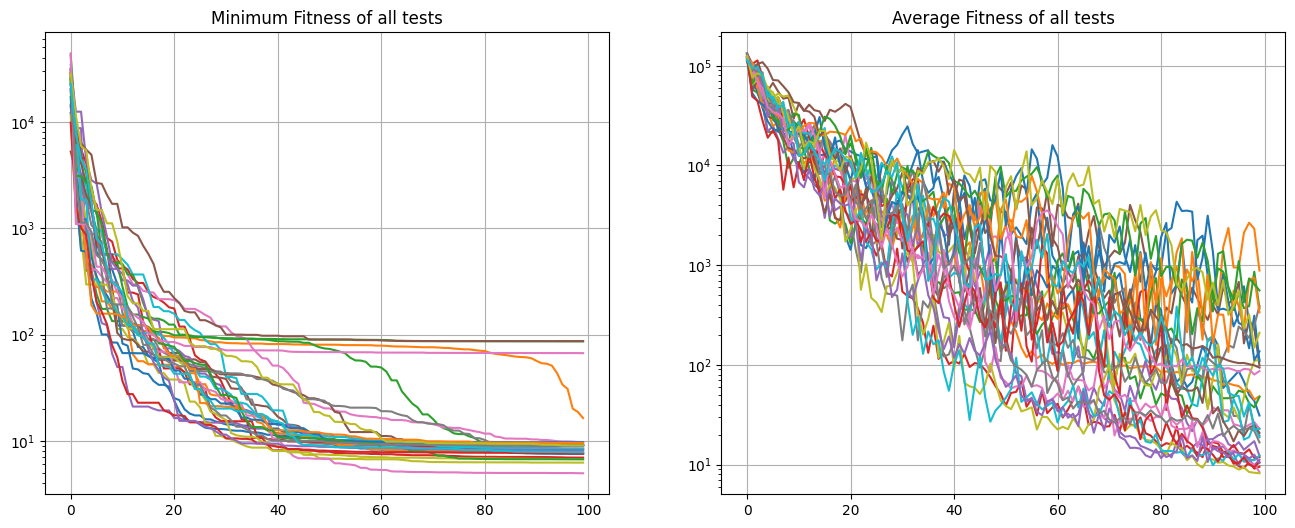

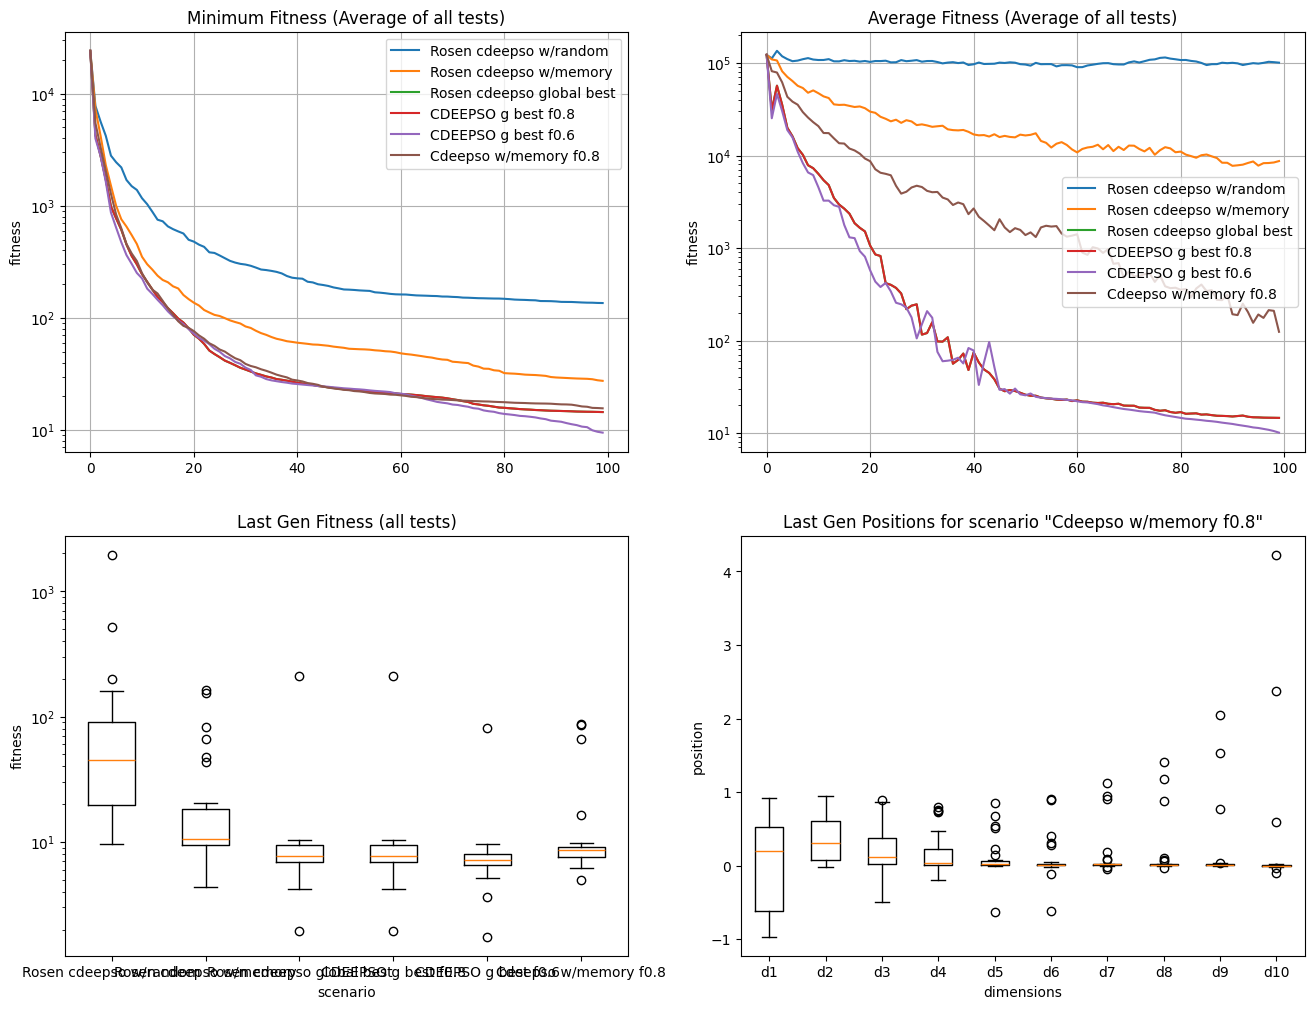

In [64]:
# experiment to make and test title
experiment_name="cdeepso_memory"
title="Cdeepso w/memory f0.8"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["fitness_last"] = []
scenario_table[title]["position_last"] = []

# optional collectors for this scenario only
table_test = {}

num_tests = 30 # number of tests to make
bounds = [-5,5]
population_size = 50
max_it=100
cdeepso = LoopCDEEPSO(title,experiment_name, bounds,
                    population_size=population_size,
                    f_var=0.8,
                    max_it=max_it,
                    tcom=0.94,
                    tmut=0.2,
                    #velocity_bounds=[-1,1],
                    w_bounds=[0,1],
                    wi_initial=0.5,
                    wa_initial=0.5,
                    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=10,seed=num)
  generation_data = cdeepso.test(coordinates, Rosenbrock, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       
    
for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
collect_data_on_scenario(scenario_table[title], num_tests) # Collecting entire scenario data

plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
#contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animacoes/"+title+".mp4",max_it=100)
#from IPython.display import Video
#Video("animacoes/"+title+".mp4")

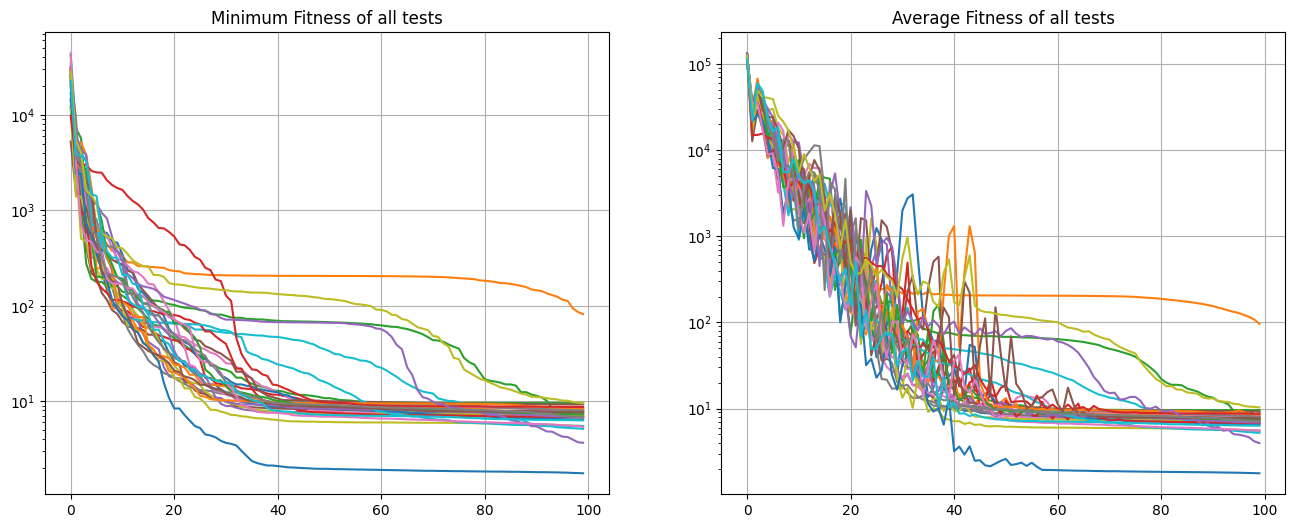

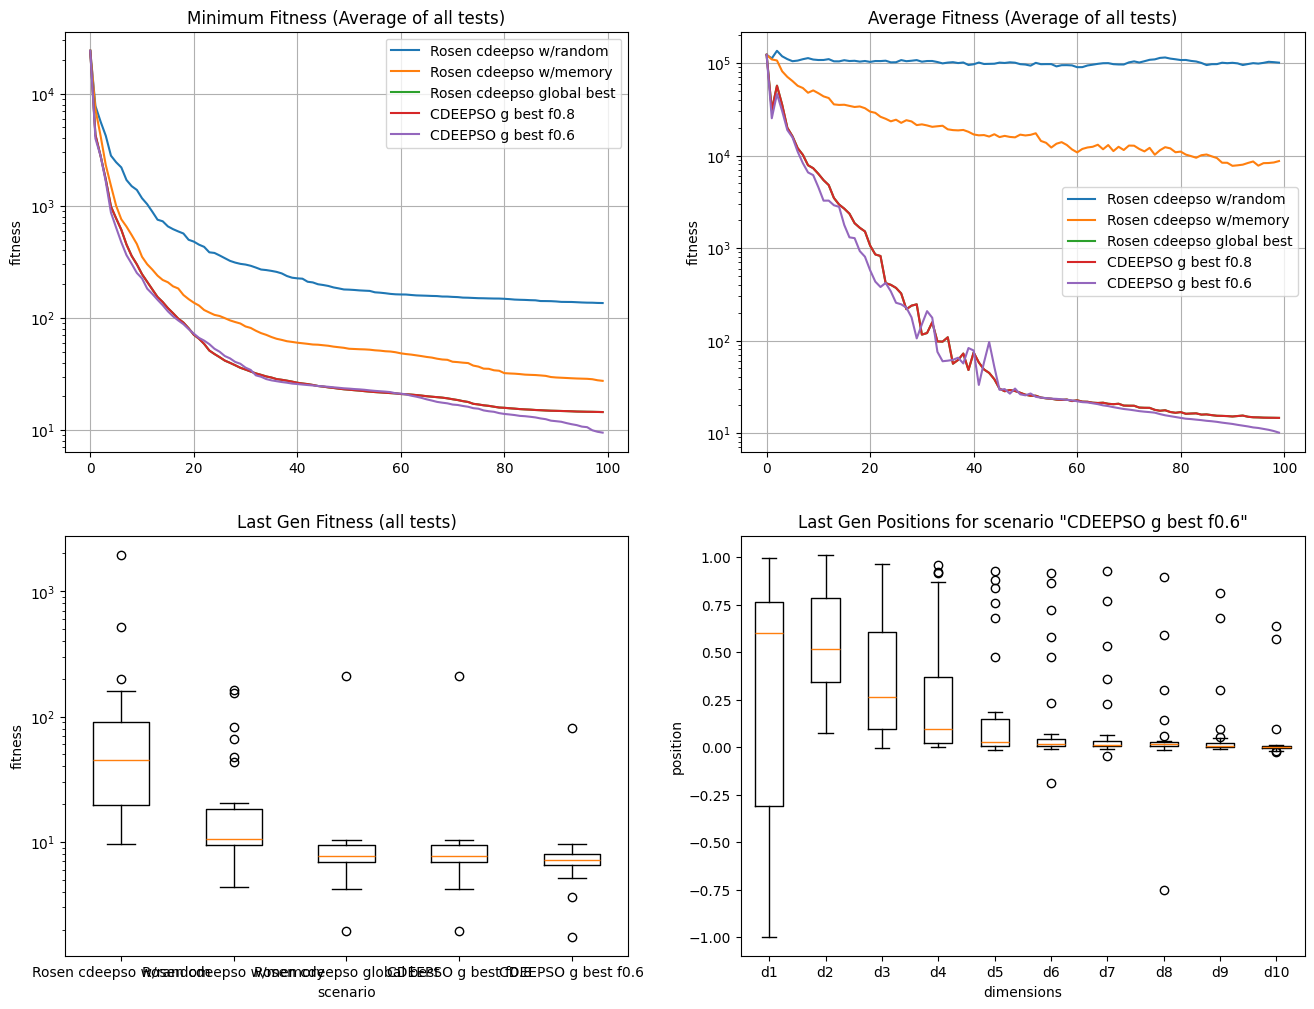

In [63]:
# experiment to make and test title
experiment_name="cdeepso_rand_1"
title="CDEEPSO g best f0.6"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["fitness_last"] = []
scenario_table[title]["position_last"] = []

# optional collectors for this scenario only
table_test = {}

num_tests = 30 # number of tests to make
bounds = [-5,5]
population_size = 50
max_it=100
cdeepso = LoopCDEEPSO(title,experiment_name, bounds,
                    population_size=population_size,
                    f_var=0.6,
                    max_it=max_it,
                    tcom=0.94,
                    tmut=0.2,
                    #velocity_bounds=[-1,1],
                    w_bounds=[0,1],
                    wi_initial=0.5,
                    wa_initial=0.5,
                    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=10,seed=num)
  generation_data = cdeepso.test(coordinates, Rosenbrock, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       
    
for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
collect_data_on_scenario(scenario_table[title], num_tests) # Collecting entire scenario data

plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
#contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animacoes/"+title+".mp4",max_it=100)
#from IPython.display import Video
#Video("animacoes/"+title+".mp4")

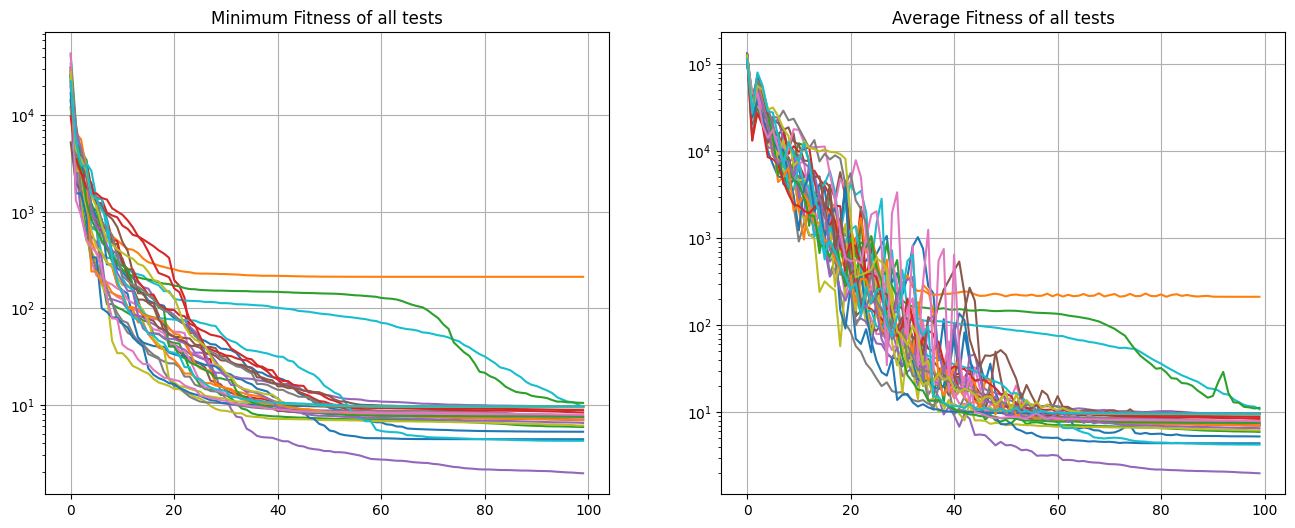

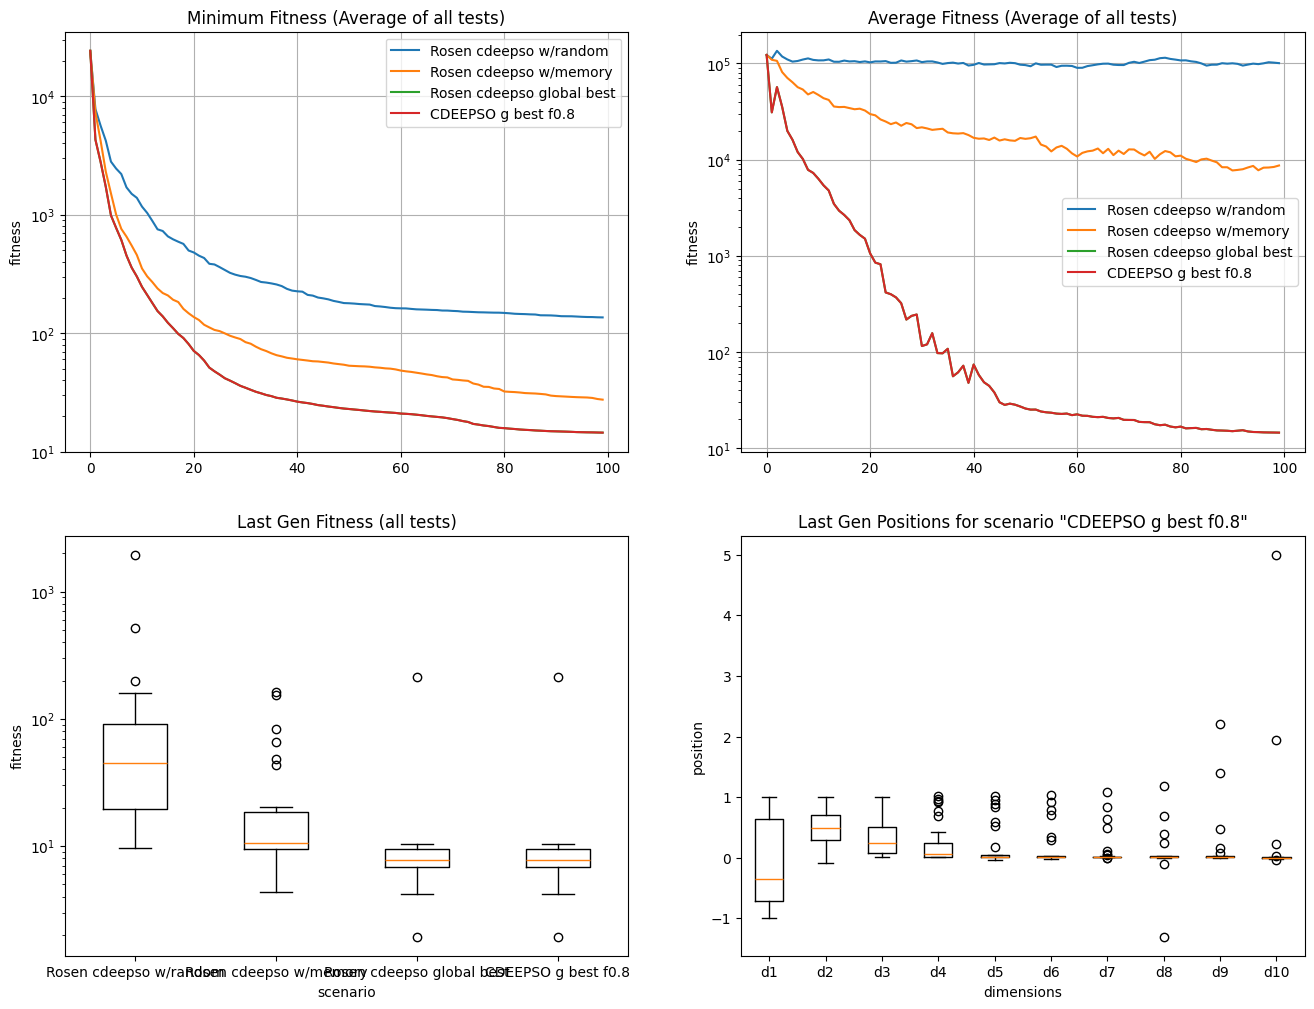

In [62]:
# experiment to make and test title
experiment_name="cdeepso_rand_1"
title="CDEEPSO g best f0.8"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["fitness_last"] = []
scenario_table[title]["position_last"] = []

# optional collectors for this scenario only
table_test = {}

num_tests = 30 # number of tests to make
bounds = [-5,5]
population_size = 50
max_it=100
cdeepso = LoopCDEEPSO(title,experiment_name, bounds,
                    population_size=population_size,
                    f_var=0.8,
                    max_it=max_it,
                    tcom=0.94,
                    tmut=0.2,
                    #velocity_bounds=[-1,1],
                    w_bounds=[0,1],
                    wi_initial=0.5,
                    wa_initial=0.5,
                    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=10,seed=num)
  generation_data = cdeepso.test(coordinates, Rosenbrock, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       
    
for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
collect_data_on_scenario(scenario_table[title], num_tests) # Collecting entire scenario data

plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
#contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animacoes/"+title+".mp4",max_it=100)
#from IPython.display import Video
#Video("animacoes/"+title+".mp4")